In [2]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(os.listdir("C:/Users/오원석/user_name/elo-merchant-category-recommendation"))

['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
new_merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/new_merchant_transactions.csv")

In [4]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [5]:
total = new_merchant.isnull().sum().sort_values(ascending = False)
percent = (new_merchant.isnull().sum()/new_merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,111745,5.692473
category_3,55922,2.848758
merchant_id,26216,1.335486
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


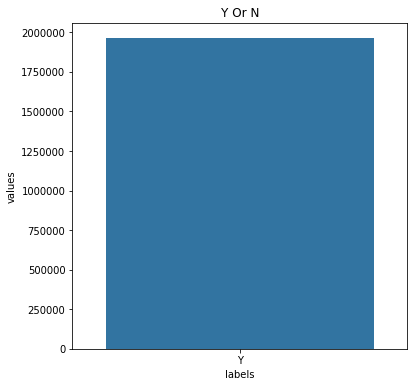

In [6]:
temp = new_merchant["authorized_flag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

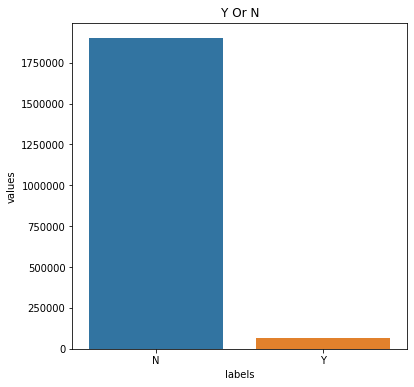

In [7]:
temp = new_merchant["category_1"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

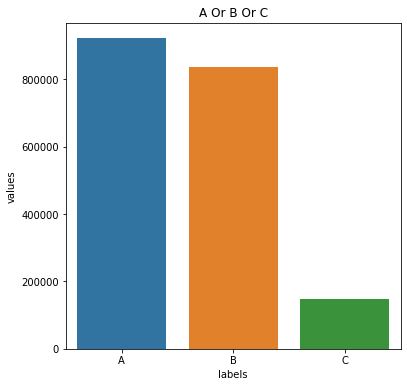

In [8]:
temp = new_merchant["category_3"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('A Or B Or C')
sns.barplot(x='labels', y='values', data=df)
plt.show()

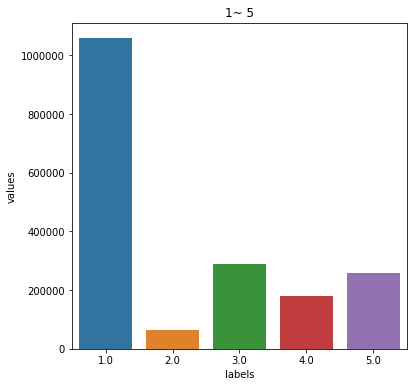

In [9]:
temp = new_merchant["category_2"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

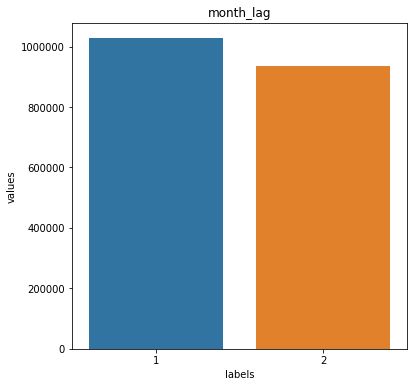

In [10]:
temp = new_merchant["month_lag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('month_lag')
sns.barplot(x='labels', y='values', data=df)
plt.show()

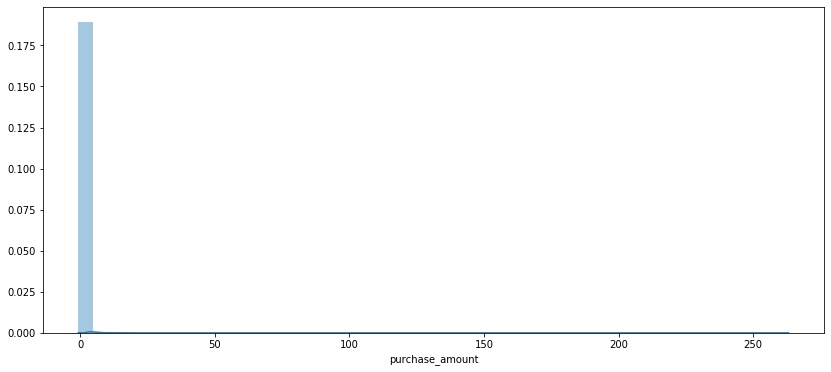

In [12]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(new_merchant['purchase_amount'])

In [13]:
new_merchant['authorized_flag']=new_merchant['authorized_flag'].map({'Y':1, 'N':0})
new_merchant['category_1']=new_merchant['category_1'].map({'Y':1, 'N':0})

In [14]:
def aggregate_new_transactions(new_trans):   
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip()
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
   
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
   
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
   
    return agg_new_trans

In [15]:
new_trans = aggregate_new_transactions(new_merchant)

In [16]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_415bb3a509,107,0,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,1,C_ID_415bb3a509,140,0,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,1,C_ID_415bb3a509,330,0,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,1,C_ID_415bb3a509,-1,1,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,1,C_ID_ef55cf8d4b,-1,1,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
